# 5 Layer Fully Connected Neural Network

Import tensorflow module, mnist dataset and matplotlib library for ploting learning history

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

Load MNIST data

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Initialize constant variables

In [3]:
K = 200
L = 300
M = 60
N = 30

**Initialize Variables and Placeholders**

Layer - 1

In [4]:
W1 = tf.Variable(tf.truncated_normal([28 * 28, K], stddev=0.1))
B1 = tf.Variable(tf.zeros([K]))

Layer - 2

In [5]:
W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1))
B2 = tf.Variable(tf.zeros([L]))

Layer - 3

In [6]:
W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B3 = tf.Variable(tf.zeros([M]))

Layer - 4

In [7]:
W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.zeros([N]))

Layer - 5

In [8]:
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

Define variables and graph for neural network mode

![title](5_layer.png)

5 layer Neural Network:
* Input Layer
* Fully Connected Layer [200 Neurons, Activation RELU]
* Fully Connected Layer [100 Neurons, Activation RELU]
* Fully Connected Layer [60 Neurons, Activation RELU]
* Fully Connected Layer [30 Neurons, Activation RELU]
* Output Layer [Softmax]

In [9]:
X = tf.placeholder(tf.float32, [None, 784])
Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Y = tf.nn.softmax(tf.matmul(Y4, W5) + B5)

Initialize variables

In [11]:
Y_pred = tf.placeholder(tf.float32, [None, 10])

Define cross entropy [*loss function*]

In [12]:
cross_entropy = -tf.reduce_sum(Y_pred * tf.log(Y))

In [13]:
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Define Gradient Descent Optimizer

In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [15]:
sess = tf.Session()
sess.run(init)

In [16]:
test_accuracy = []
test_cross = []
for i in range(8000):
    # Load batch
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_pred: batch_Y}

    # Train
    sess.run(train_step, feed_dict=train_data)
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)

    test_data = {X: mnist.test.images, Y_pred: mnist.test.labels}
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    print("Train data Accuracy: {}, Train data Cross Entropy: {}".format(a_train, c_train))
    print("Test data Accuracy: {}, Test data Cross Entropy: {}".format(a_test, c_test))

    # Append to list
    test_accuracy.append(a_test)
    test_cross.append(c_test)

Train data Accuracy: 0.1899999976158142, Train data Cross Entropy: 226.37139892578125
Test data Accuracy: 0.11389999836683273, Test data Cross Entropy: 22961.853515625
Train data Accuracy: 0.2199999988079071, Train data Cross Entropy: 226.23477172851562
Test data Accuracy: 0.14329999685287476, Test data Cross Entropy: 22837.98828125
Train data Accuracy: 0.18000000715255737, Train data Cross Entropy: 226.74351501464844
Test data Accuracy: 0.18440000712871552, Test data Cross Entropy: 22721.041015625
Train data Accuracy: 0.23999999463558197, Train data Cross Entropy: 224.06478881835938
Test data Accuracy: 0.20020000636577606, Test data Cross Entropy: 22610.697265625
Train data Accuracy: 0.2199999988079071, Train data Cross Entropy: 222.1855926513672
Test data Accuracy: 0.19990000128746033, Test data Cross Entropy: 22455.3046875
Train data Accuracy: 0.25999999046325684, Train data Cross Entropy: 218.20848083496094
Test data Accuracy: 0.19349999725818634, Test data Cross Entropy: 22311.992

Train data Accuracy: 0.699999988079071, Train data Cross Entropy: 100.31501770019531
Test data Accuracy: 0.5895000100135803, Test data Cross Entropy: 12260.046875
Train data Accuracy: 0.6499999761581421, Train data Cross Entropy: 97.88188171386719
Test data Accuracy: 0.6561999917030334, Test data Cross Entropy: 10200.5263671875
Train data Accuracy: 0.7200000286102295, Train data Cross Entropy: 81.00646209716797
Test data Accuracy: 0.6534000039100647, Test data Cross Entropy: 9175.14453125
Train data Accuracy: 0.7799999713897705, Train data Cross Entropy: 71.15764617919922
Test data Accuracy: 0.7544999718666077, Test data Cross Entropy: 7835.62548828125
Train data Accuracy: 0.8700000047683716, Train data Cross Entropy: 56.95719528198242
Test data Accuracy: 0.8144999742507935, Test data Cross Entropy: 6711.2900390625
Train data Accuracy: 0.8899999856948853, Train data Cross Entropy: 48.068878173828125
Test data Accuracy: 0.821399986743927, Test data Cross Entropy: 6439.6328125
Train data

Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 31.599971771240234
Test data Accuracy: 0.8697999715805054, Test data Cross Entropy: 4404.3310546875
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 23.853660583496094
Test data Accuracy: 0.8912000060081482, Test data Cross Entropy: 3783.331787109375
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 21.390888214111328
Test data Accuracy: 0.8725000023841858, Test data Cross Entropy: 4072.942138671875
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 25.53034210205078
Test data Accuracy: 0.8910999894142151, Test data Cross Entropy: 3736.714599609375
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 30.410198211669922
Test data Accuracy: 0.864799976348877, Test data Cross Entropy: 4278.63427734375
Train data Accuracy: 0.800000011920929, Train data Cross Entropy: 51.81922149658203
Test data Accuracy: 0.7768999934196472, Test data Cross Entropy: 6958.938476

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 22.17498207092285
Test data Accuracy: 0.9108999967575073, Test data Cross Entropy: 2910.815673828125
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 11.103228569030762
Test data Accuracy: 0.9050999879837036, Test data Cross Entropy: 2929.45166015625
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 24.0233097076416
Test data Accuracy: 0.9132000207901001, Test data Cross Entropy: 2873.6220703125
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 19.44160270690918
Test data Accuracy: 0.9103000164031982, Test data Cross Entropy: 2869.57470703125
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 12.449503898620605
Test data Accuracy: 0.8977000117301941, Test data Cross Entropy: 3196.50830078125
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 17.504867553710938
Test data Accuracy: 0.9129999876022339, Test data Cross Entropy: 2885.6333007812

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 8.68569278717041
Test data Accuracy: 0.9228000044822693, Test data Cross Entropy: 2516.03125
Train data Accuracy: 1.0, Train data Cross Entropy: 5.676931858062744
Test data Accuracy: 0.9246000051498413, Test data Cross Entropy: 2430.513427734375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 11.527968406677246
Test data Accuracy: 0.9189000129699707, Test data Cross Entropy: 2636.00146484375
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 19.415082931518555
Test data Accuracy: 0.8708000183105469, Test data Cross Entropy: 4274.7861328125
Train data Accuracy: 0.8299999833106995, Train data Cross Entropy: 39.75333023071289
Test data Accuracy: 0.8429999947547913, Test data Cross Entropy: 5123.6533203125
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 23.251930236816406
Test data Accuracy: 0.8743000030517578, Test data Cross Entropy: 3999.8173828125
Train data Accuracy

Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 29.356399536132812
Test data Accuracy: 0.8895000219345093, Test data Cross Entropy: 3561.59375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 19.258079528808594
Test data Accuracy: 0.9287999868392944, Test data Cross Entropy: 2362.490234375
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 17.53392791748047
Test data Accuracy: 0.9277999997138977, Test data Cross Entropy: 2374.497314453125
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 13.08719253540039
Test data Accuracy: 0.9340999722480774, Test data Cross Entropy: 2126.75244140625
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 12.886444091796875
Test data Accuracy: 0.9178000092506409, Test data Cross Entropy: 2561.030029296875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 11.198641777038574
Test data Accuracy: 0.9142000079154968, Test data Cross Entropy: 2713.197998046875

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 7.871768474578857
Test data Accuracy: 0.9399999976158142, Test data Cross Entropy: 1939.831787109375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.688148498535156
Test data Accuracy: 0.9376999735832214, Test data Cross Entropy: 2064.37841796875
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 18.74843406677246
Test data Accuracy: 0.9384999871253967, Test data Cross Entropy: 2009.102783203125
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 10.078950881958008
Test data Accuracy: 0.9277999997138977, Test data Cross Entropy: 2275.7109375
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 11.715157508850098
Test data Accuracy: 0.9408000111579895, Test data Cross Entropy: 1947.740234375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 11.701822280883789
Test data Accuracy: 0.9417999982833862, Test data Cross Entropy: 1926.389892578125

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 12.89111614227295
Test data Accuracy: 0.9404000043869019, Test data Cross Entropy: 1952.1865234375
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 12.174310684204102
Test data Accuracy: 0.9502000212669373, Test data Cross Entropy: 1670.836669921875
Train data Accuracy: 1.0, Train data Cross Entropy: 4.216107368469238
Test data Accuracy: 0.9472000002861023, Test data Cross Entropy: 1794.244873046875
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 10.590326309204102
Test data Accuracy: 0.9488999843597412, Test data Cross Entropy: 1681.8240966796875
Train data Accuracy: 1.0, Train data Cross Entropy: 4.478777885437012
Test data Accuracy: 0.9483000040054321, Test data Cross Entropy: 1714.831298828125
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 12.584596633911133
Test data Accuracy: 0.9441999793052673, Test data Cross Entropy: 1902.37060546875
Train data Accuracy: 0

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 11.453216552734375
Test data Accuracy: 0.8942999839782715, Test data Cross Entropy: 3518.64013671875
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 16.75146484375
Test data Accuracy: 0.9329000115394592, Test data Cross Entropy: 2142.36083984375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 11.394186019897461
Test data Accuracy: 0.9408000111579895, Test data Cross Entropy: 1899.623291015625
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 14.70973014831543
Test data Accuracy: 0.9266999959945679, Test data Cross Entropy: 2332.652099609375
Train data Accuracy: 1.0, Train data Cross Entropy: 6.093026161193848
Test data Accuracy: 0.9524999856948853, Test data Cross Entropy: 1537.0518798828125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.016094207763672
Test data Accuracy: 0.9517999887466431, Test data Cross Entropy: 1534.47705078125
Train data

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 7.212132930755615
Test data Accuracy: 0.9534000158309937, Test data Cross Entropy: 1531.4405517578125
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 9.092487335205078
Test data Accuracy: 0.9427000284194946, Test data Cross Entropy: 1808.3658447265625
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 17.19791603088379
Test data Accuracy: 0.9453999996185303, Test data Cross Entropy: 1774.2537841796875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 9.336336135864258
Test data Accuracy: 0.9466000199317932, Test data Cross Entropy: 1680.3133544921875
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 13.486173629760742
Test data Accuracy: 0.9552000164985657, Test data Cross Entropy: 1458.731201171875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 9.634037017822266
Test data Accuracy: 0.9523000121116638, Test data Cross Entropy: 1557.

Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 17.401397705078125
Test data Accuracy: 0.9394999742507935, Test data Cross Entropy: 2003.352783203125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.582236289978027
Test data Accuracy: 0.9391999840736389, Test data Cross Entropy: 1981.4891357421875
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 12.974599838256836
Test data Accuracy: 0.9419000148773193, Test data Cross Entropy: 1858.3927001953125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.528204441070557
Test data Accuracy: 0.9401999711990356, Test data Cross Entropy: 1945.3211669921875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.671037197113037
Test data Accuracy: 0.9528999924659729, Test data Cross Entropy: 1507.6221923828125
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 8.500506401062012
Test data Accuracy: 0.946399986743927, Test data Cross Entropy: 1665.

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.167201995849609
Test data Accuracy: 0.9510999917984009, Test data Cross Entropy: 1556.5098876953125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.399916648864746
Test data Accuracy: 0.9552000164985657, Test data Cross Entropy: 1463.45361328125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.41585111618042
Test data Accuracy: 0.9598000049591064, Test data Cross Entropy: 1326.2669677734375
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.7253265380859375
Test data Accuracy: 0.9531000256538391, Test data Cross Entropy: 1510.226806640625
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 12.387406349182129
Test data Accuracy: 0.9606999754905701, Test data Cross Entropy: 1280.9732666015625
Train data Accuracy: 1.0, Train data Cross Entropy: 2.2211289405822754
Test data Accuracy: 0.95660001039505, Test data Cross Entropy: 1354.3623046875
Train d

Train data Accuracy: 1.0, Train data Cross Entropy: 1.429384469985962
Test data Accuracy: 0.946399986743927, Test data Cross Entropy: 1704.2034912109375
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 6.24429178237915
Test data Accuracy: 0.9445000290870667, Test data Cross Entropy: 1835.88671875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.6501002311706543
Test data Accuracy: 0.9534000158309937, Test data Cross Entropy: 1551.456787109375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.888838291168213
Test data Accuracy: 0.960099995136261, Test data Cross Entropy: 1264.632568359375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4550912380218506
Test data Accuracy: 0.9573000073432922, Test data Cross Entropy: 1347.77490234375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.0707643032073975
Test data Accuracy: 0.9577999711036682, Test data Cross Entropy: 1315.601806640625
Train data Accuracy: 1.0, Train data Cross Entropy: 2.28

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.2356672286987305
Test data Accuracy: 0.9544000029563904, Test data Cross Entropy: 1460.3482666015625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.8915491104125977
Test data Accuracy: 0.9599999785423279, Test data Cross Entropy: 1275.197998046875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.9135427474975586
Test data Accuracy: 0.9595000147819519, Test data Cross Entropy: 1309.07861328125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2080703973770142
Test data Accuracy: 0.9614999890327454, Test data Cross Entropy: 1262.63623046875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.3649559020996094
Test data Accuracy: 0.958899974822998, Test data Cross Entropy: 1368.9383544921875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.106071472167969
Test data Accuracy: 0.9538999795913696, Test data Cross Entropy: 1599.195068359375
Train data Accuracy: 1.0, Train data Cross Entro

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 4.276220321655273
Test data Accuracy: 0.9625999927520752, Test data Cross Entropy: 1194.2530517578125
Train data Accuracy: 1.0, Train data Cross Entropy: 2.528714656829834
Test data Accuracy: 0.9571999907493591, Test data Cross Entropy: 1415.940673828125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.7960174083709717
Test data Accuracy: 0.9584000110626221, Test data Cross Entropy: 1380.205078125
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 7.146295547485352
Test data Accuracy: 0.9541000127792358, Test data Cross Entropy: 1486.462646484375
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.490647792816162
Test data Accuracy: 0.9625999927520752, Test data Cross Entropy: 1209.33251953125
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 13.618098258972168
Test data Accuracy: 0.9309999942779541, Test data Cross Entropy: 2158.813720703125
Train data Accuracy: 0.9

Train data Accuracy: 1.0, Train data Cross Entropy: 2.303025245666504
Test data Accuracy: 0.9646000266075134, Test data Cross Entropy: 1171.685791015625
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 9.098018646240234
Test data Accuracy: 0.9585000276565552, Test data Cross Entropy: 1323.3359375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.768151760101318
Test data Accuracy: 0.958899974822998, Test data Cross Entropy: 1319.0555419921875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4631088972091675
Test data Accuracy: 0.9592000246047974, Test data Cross Entropy: 1325.1181640625
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 8.061274528503418
Test data Accuracy: 0.9621999859809875, Test data Cross Entropy: 1242.84765625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.7190635204315186
Test data Accuracy: 0.9642999768257141, Test data Cross Entropy: 1159.325439453125
Train data Accuracy: 1.0, Train

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.176891326904297
Test data Accuracy: 0.9588000178337097, Test data Cross Entropy: 1377.4622802734375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.2114949226379395
Test data Accuracy: 0.9661999940872192, Test data Cross Entropy: 1172.89794921875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.6225931644439697
Test data Accuracy: 0.9589999914169312, Test data Cross Entropy: 1330.6102294921875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.09649395942688
Test data Accuracy: 0.9577999711036682, Test data Cross Entropy: 1366.9866943359375
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.710255146026611
Test data Accuracy: 0.9524999856948853, Test data Cross Entropy: 1568.280029296875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 6.890649795532227
Test data Accuracy: 0.9603000283241272, Test data Cross Entropy: 1299.36767578125
Train

Train data Accuracy: 1.0, Train data Cross Entropy: 1.6007370948791504
Test data Accuracy: 0.9631999731063843, Test data Cross Entropy: 1254.2640380859375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.2506275177001953
Test data Accuracy: 0.9614999890327454, Test data Cross Entropy: 1248.72900390625
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 10.341644287109375
Test data Accuracy: 0.9603999853134155, Test data Cross Entropy: 1323.5025634765625
Train data Accuracy: 1.0, Train data Cross Entropy: 3.714231491088867
Test data Accuracy: 0.9588000178337097, Test data Cross Entropy: 1291.5196533203125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.7739081382751465
Test data Accuracy: 0.9577999711036682, Test data Cross Entropy: 1345.158447265625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.277344703674316
Test data Accuracy: 0.9606999754905701, Test data Cross Entropy: 1251.66796875
Train data Accuracy: 0.9900000095367432, Train dat

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.2491559982299805
Test data Accuracy: 0.963699996471405, Test data Cross Entropy: 1165.616455078125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.3050928115844727
Test data Accuracy: 0.9641000032424927, Test data Cross Entropy: 1157.492431640625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.899021625518799
Test data Accuracy: 0.9625999927520752, Test data Cross Entropy: 1194.2635498046875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0303035974502563
Test data Accuracy: 0.9660999774932861, Test data Cross Entropy: 1111.168701171875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.355865001678467
Test data Accuracy: 0.9643999934196472, Test data Cross Entropy: 1173.0
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 6.420305252075195
Test data Accuracy: 0.9585999846458435, Test data Cross Entropy: 1360.086669921875
Train data Accu

Train data Accuracy: 1.0, Train data Cross Entropy: 1.5060228109359741
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1033.908447265625
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 8.204840660095215
Test data Accuracy: 0.957099974155426, Test data Cross Entropy: 1389.873779296875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 4.749663352966309
Test data Accuracy: 0.9623000025749207, Test data Cross Entropy: 1183.244140625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4145550727844238
Test data Accuracy: 0.9656000137329102, Test data Cross Entropy: 1087.1126708984375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.115513563156128
Test data Accuracy: 0.9639999866485596, Test data Cross Entropy: 1116.9573974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.3930859565734863
Test data Accuracy: 0.9634000062942505, Test data Cross Entropy: 1152.48583984375
Train data Accuracy: 1.0, Train data Cross Entropy: 

Train data Accuracy: 1.0, Train data Cross Entropy: 4.36761474609375
Test data Accuracy: 0.964900016784668, Test data Cross Entropy: 1151.2183837890625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.7043938636779785
Test data Accuracy: 0.9580000042915344, Test data Cross Entropy: 1350.163330078125
Train data Accuracy: 1.0, Train data Cross Entropy: 3.624406099319458
Test data Accuracy: 0.9667999744415283, Test data Cross Entropy: 1139.601318359375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.651423454284668
Test data Accuracy: 0.9688000082969666, Test data Cross Entropy: 1081.67919921875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.8205640316009521
Test data Accuracy: 0.9685999751091003, Test data Cross Entropy: 1066.889404296875
Train data Accuracy: 1.0, Train data Cross Entropy: 4.1206135749816895
Test data Accuracy: 0.9649999737739563, Test data Cross Entropy: 1186.7523193359375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.59326171875

Train data Accuracy: 1.0, Train data Cross Entropy: 1.7111778259277344
Test data Accuracy: 0.9672999978065491, Test data Cross Entropy: 1108.9501953125
Train data Accuracy: 1.0, Train data Cross Entropy: 3.0061118602752686
Test data Accuracy: 0.9661999940872192, Test data Cross Entropy: 1135.0335693359375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 5.288678169250488
Test data Accuracy: 0.9490000009536743, Test data Cross Entropy: 1672.62060546875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.905252456665039
Test data Accuracy: 0.9638000130653381, Test data Cross Entropy: 1158.37353515625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.213935136795044
Test data Accuracy: 0.9648000001907349, Test data Cross Entropy: 1122.04638671875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0567045211791992
Test data Accuracy: 0.9674000144004822, Test data Cross Entropy: 1038.49658203125
Train data Accuracy: 0.9800000190734863

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5620208978652954
Test data Accuracy: 0.970300018787384, Test data Cross Entropy: 986.0086669921875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0134878158569336
Test data Accuracy: 0.9700000286102295, Test data Cross Entropy: 1006.53466796875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1968724727630615
Test data Accuracy: 0.9696000218391418, Test data Cross Entropy: 1004.9508056640625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1219053268432617
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 983.7293701171875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.2251439094543457
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1036.2974853515625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.350391149520874
Test data Accuracy: 0.9713000059127808, Test data Cross Entropy: 970.0841064453125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.92221117

Train data Accuracy: 1.0, Train data Cross Entropy: 0.924735426902771
Test data Accuracy: 0.9703999757766724, Test data Cross Entropy: 931.232666015625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1326478719711304
Test data Accuracy: 0.9702000021934509, Test data Cross Entropy: 1018.9056396484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6203040480613708
Test data Accuracy: 0.968999981880188, Test data Cross Entropy: 1039.969482421875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.8607134819030762
Test data Accuracy: 0.9707000255584717, Test data Cross Entropy: 981.9918212890625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1292719841003418
Test data Accuracy: 0.9715999960899353, Test data Cross Entropy: 958.1557006835938
Train data Accuracy: 1.0, Train data Cross Entropy: 1.3664339780807495
Test data Accuracy: 0.967199981212616, Test data Cross Entropy: 1040.232666015625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.4332494735

Train data Accuracy: 1.0, Train data Cross Entropy: 1.7807626724243164
Test data Accuracy: 0.9664999842643738, Test data Cross Entropy: 1166.4111328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9016032814979553
Test data Accuracy: 0.9700999855995178, Test data Cross Entropy: 1002.2889404296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9400089979171753
Test data Accuracy: 0.9684000015258789, Test data Cross Entropy: 1078.83251953125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.1877583265304565
Test data Accuracy: 0.9656999707221985, Test data Cross Entropy: 1133.4757080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.288191318511963
Test data Accuracy: 0.9656000137329102, Test data Cross Entropy: 1206.32080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 2.1165308952331543
Test data Accuracy: 0.9638000130653381, Test data Cross Entropy: 1277.148193359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7186326980

Train data Accuracy: 1.0, Train data Cross Entropy: 1.1926143169403076
Test data Accuracy: 0.9692999720573425, Test data Cross Entropy: 1074.971435546875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1476027965545654
Test data Accuracy: 0.9646999835968018, Test data Cross Entropy: 1230.3377685546875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.3736414909362793
Test data Accuracy: 0.9523000121116638, Test data Cross Entropy: 1618.52880859375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.974072217941284
Test data Accuracy: 0.9460999965667725, Test data Cross Entropy: 1842.9285888671875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.9495837688446045
Test data Accuracy: 0.9675999879837036, Test data Cross Entropy: 1148.678466796875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 7.1476216316223145
Test data Accuracy: 0.9660000205039978, Test data Cross Entropy: 1167.7520751953125
Train data Accuracy: 1.0, Trai

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.0114738941192627
Test data Accuracy: 0.9653000235557556, Test data Cross Entropy: 1167.53271484375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.377047061920166
Test data Accuracy: 0.9674000144004822, Test data Cross Entropy: 1013.26904296875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.818816661834717
Test data Accuracy: 0.963699996471405, Test data Cross Entropy: 1120.9091796875
Train data Accuracy: 1.0, Train data Cross Entropy: 2.204874038696289
Test data Accuracy: 0.9634000062942505, Test data Cross Entropy: 1259.3021240234375
Train data Accuracy: 1.0, Train data Cross Entropy: 2.1420021057128906
Test data Accuracy: 0.9657999873161316, Test data Cross Entropy: 1123.4140625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.743117332458496
Test data Accuracy: 0.9652000069618225, Test data Cross Entropy: 1152.396484375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.18896460

Train data Accuracy: 1.0, Train data Cross Entropy: 0.9053272008895874
Test data Accuracy: 0.9702000021934509, Test data Cross Entropy: 1031.483642578125
Train data Accuracy: 1.0, Train data Cross Entropy: 3.0685462951660156
Test data Accuracy: 0.9646000266075134, Test data Cross Entropy: 1294.628173828125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.1038336753845215
Test data Accuracy: 0.9702000021934509, Test data Cross Entropy: 1063.5234375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.6222753524780273
Test data Accuracy: 0.9707000255584717, Test data Cross Entropy: 1043.8421630859375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.2906222343444824
Test data Accuracy: 0.9681000113487244, Test data Cross Entropy: 1121.162109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4495215117931366
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1044.2691650390625
Train data Accuracy: 1.0, Train data Cross Entropy: 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.7535739541053772
Test data Accuracy: 0.9675999879837036, Test data Cross Entropy: 1119.0125732421875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.8450891971588135
Test data Accuracy: 0.9682999849319458, Test data Cross Entropy: 1077.0401611328125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.785886526107788
Test data Accuracy: 0.9672999978065491, Test data Cross Entropy: 1076.68701171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5126659274101257
Test data Accuracy: 0.9684000015258789, Test data Cross Entropy: 1052.76513671875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.330273628234863
Test data Accuracy: 0.9639999866485596, Test data Cross Entropy: 1220.189453125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.9803727865219116
Test data Accuracy: 0.9656999707221985, Test data Cross Entropy: 1163.0286865234375
Train data Accuracy: 0.980000019073

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.725879192352295
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1082.743896484375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4345896244049072
Test data Accuracy: 0.9706000089645386, Test data Cross Entropy: 1026.0267333984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8314800262451172
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 955.6514892578125
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.259796142578125
Test data Accuracy: 0.9718999862670898, Test data Cross Entropy: 972.6624755859375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.914536714553833
Test data Accuracy: 0.9707000255584717, Test data Cross Entropy: 1000.3318481445312
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.2529296875
Test data Accuracy: 0.9686999917030334, Test data Cross Entropy: 1076.4559326171875
Train data Accuracy: 0.99000000953674

Train data Accuracy: 1.0, Train data Cross Entropy: 0.6819726228713989
Test data Accuracy: 0.9724000096321106, Test data Cross Entropy: 998.6945190429688
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4254162311553955
Test data Accuracy: 0.9649999737739563, Test data Cross Entropy: 1185.640869140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5185375809669495
Test data Accuracy: 0.9625999927520752, Test data Cross Entropy: 1251.9981689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5154273509979248
Test data Accuracy: 0.9642000198364258, Test data Cross Entropy: 1212.262939453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.755160927772522
Test data Accuracy: 0.9652000069618225, Test data Cross Entropy: 1159.12255859375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0500868558883667
Test data Accuracy: 0.9678000211715698, Test data Cross Entropy: 1109.42919921875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2833517789840698
Test da

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.8135170936584473
Test data Accuracy: 0.9697999954223633, Test data Cross Entropy: 1022.5890502929688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.43187302350997925
Test data Accuracy: 0.970300018787384, Test data Cross Entropy: 986.572509765625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2220582962036133
Test data Accuracy: 0.9642999768257141, Test data Cross Entropy: 1191.81005859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8852907419204712
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1028.944091796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7049155235290527
Test data Accuracy: 0.9659000039100647, Test data Cross Entropy: 1128.4700927734375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2684407234191895
Test data Accuracy: 0.9696999788284302, Test data Cross Entropy: 1047.402099609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8445793

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.8432750701904297
Test data Accuracy: 0.9728999733924866, Test data Cross Entropy: 902.4652099609375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1181328296661377
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 900.6015625
Train data Accuracy: 1.0, Train data Cross Entropy: 2.598139762878418
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 918.2510375976562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7185959815979004
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 828.336181640625
Train data Accuracy: 1.0, Train data Cross Entropy: 3.079705238342285
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 915.751953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9496315717697144
Test data Accuracy: 0.972000002861023, Test data Cross Entropy: 891.926025390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6272401213645935
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.7160232067108154
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 859.2421264648438
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2137258052825928
Test data Accuracy: 0.974399983882904, Test data Cross Entropy: 918.024169921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8685356378555298
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 980.3942260742188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9529852271080017
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 904.4332275390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7941712141036987
Test data Accuracy: 0.9728999733924866, Test data Cross Entropy: 920.3048095703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6009259223937988
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 908.8757934570312
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4904018640518188
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5918929576873779
Test data Accuracy: 0.9710000157356262, Test data Cross Entropy: 992.781494140625
Train data Accuracy: 1.0, Train data Cross Entropy: 2.280074119567871
Test data Accuracy: 0.9638000130653381, Test data Cross Entropy: 1205.99609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9648706316947937
Test data Accuracy: 0.9689000248908997, Test data Cross Entropy: 1071.3814697265625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.476067543029785
Test data Accuracy: 0.9711999893188477, Test data Cross Entropy: 981.3034057617188
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.6320037841796875
Test data Accuracy: 0.970300018787384, Test data Cross Entropy: 992.4955444335938
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.024950981140137
Test data Accuracy: 0.9693999886512756, Test data Cross Entropy: 1015.0049438476562
Train data Accuracy: 0.990000009536743

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5450505018234253
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 843.3018798828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9656620025634766
Test data Accuracy: 0.9728999733924866, Test data Cross Entropy: 956.0810546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5140769481658936
Test data Accuracy: 0.972100019454956, Test data Cross Entropy: 941.5140380859375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.001600742340088
Test data Accuracy: 0.9725000262260437, Test data Cross Entropy: 931.2825317382812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2883785665035248
Test data Accuracy: 0.9739000201225281, Test data Cross Entropy: 893.0618286132812
Train data Accuracy: 1.0, Train data Cross Entropy: 1.135885238647461
Test data Accuracy: 0.9746000170707703, Test data Cross Entropy: 871.958251953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.59745442867279

Train data Accuracy: 1.0, Train data Cross Entropy: 0.43205124139785767
Test data Accuracy: 0.9718000292778015, Test data Cross Entropy: 962.0880126953125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.6625070571899414
Test data Accuracy: 0.9702000021934509, Test data Cross Entropy: 1030.6878662109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7201322913169861
Test data Accuracy: 0.9695000052452087, Test data Cross Entropy: 1016.8301391601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5264256596565247
Test data Accuracy: 0.9674000144004822, Test data Cross Entropy: 1095.016357421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6948707103729248
Test data Accuracy: 0.9731000065803528, Test data Cross Entropy: 923.2147216796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8437181115150452
Test data Accuracy: 0.9717000126838684, Test data Cross Entropy: 956.770263671875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.11495

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.9859166145324707
Test data Accuracy: 0.9616000056266785, Test data Cross Entropy: 1303.682861328125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.580633640289307
Test data Accuracy: 0.9606000185012817, Test data Cross Entropy: 1321.7476806640625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.563381671905518
Test data Accuracy: 0.972000002861023, Test data Cross Entropy: 965.9227905273438
Train data Accuracy: 1.0, Train data Cross Entropy: 1.9906744956970215
Test data Accuracy: 0.9718999862670898, Test data Cross Entropy: 942.2757568359375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.691466808319092
Test data Accuracy: 0.9725000262260437, Test data Cross Entropy: 925.709228515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7177931070327759
Test data Accuracy: 0.9646000266075134, Test data Cross Entropy: 1185.638671875
Train data Accuracy: 1.

Train data Accuracy: 1.0, Train data Cross Entropy: 1.0425264835357666
Test data Accuracy: 0.9696000218391418, Test data Cross Entropy: 1010.970703125
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 7.483880043029785
Test data Accuracy: 0.9639000296592712, Test data Cross Entropy: 1199.9224853515625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.8742761611938477
Test data Accuracy: 0.9648000001907349, Test data Cross Entropy: 1163.791748046875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.6432706117630005
Test data Accuracy: 0.9704999923706055, Test data Cross Entropy: 975.5925903320312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3206149935722351
Test data Accuracy: 0.9724000096321106, Test data Cross Entropy: 951.6533203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5382782220840454
Test data Accuracy: 0.9729999899864197, Test data Cross Entropy: 909.12451171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.

Train data Accuracy: 1.0, Train data Cross Entropy: 1.1838409900665283
Test data Accuracy: 0.9743000268936157, Test data Cross Entropy: 887.6448974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3373706638813019
Test data Accuracy: 0.9739000201225281, Test data Cross Entropy: 894.988037109375
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 8.704569816589355
Test data Accuracy: 0.9667999744415283, Test data Cross Entropy: 1101.93798828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7176880836486816
Test data Accuracy: 0.9670000076293945, Test data Cross Entropy: 1101.7581787109375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.8240551948547363
Test data Accuracy: 0.9689000248908997, Test data Cross Entropy: 1032.875732421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.43915513157844543
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 934.10888671875
Train data Accuracy: 1.0, Train data Cross Entrop

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.557046890258789
Test data Accuracy: 0.972599983215332, Test data Cross Entropy: 933.9207763671875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.5887773036956787
Test data Accuracy: 0.9685999751091003, Test data Cross Entropy: 1006.4521484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8201210498809814
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 919.1595458984375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.849426507949829
Test data Accuracy: 0.9731000065803528, Test data Cross Entropy: 922.1282348632812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2908508777618408
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 848.406982421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3876684904098511
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 844.84716796875
Train data Accuracy: 1.0, Train data Cr

Train data Accuracy: 1.0, Train data Cross Entropy: 0.4901827871799469
Test data Accuracy: 0.9674000144004822, Test data Cross Entropy: 1144.053466796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6179590821266174
Test data Accuracy: 0.9575999975204468, Test data Cross Entropy: 1480.1392822265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.46116864681243896
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 905.5687255859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5153144001960754
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 899.1593017578125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.8901007175445557
Test data Accuracy: 0.9686999917030334, Test data Cross Entropy: 1048.9232177734375
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.392993927001953
Test data Accuracy: 0.9659000039100647, Test data Cross Entropy: 1127.865478515625
Train data Accuracy: 1.0, Train data Cross En

Train data Accuracy: 1.0, Train data Cross Entropy: 0.3634313941001892
Test data Accuracy: 0.972599983215332, Test data Cross Entropy: 935.2281494140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5116866827011108
Test data Accuracy: 0.9718000292778015, Test data Cross Entropy: 952.812255859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6655620336532593
Test data Accuracy: 0.9746000170707703, Test data Cross Entropy: 872.6416625976562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6178860664367676
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 859.4649658203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.465964138507843
Test data Accuracy: 0.9740999937057495, Test data Cross Entropy: 874.0399169921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6090837717056274
Test data Accuracy: 0.9735000133514404, Test data Cross Entropy: 920.4723510742188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19138799607753754
Test da

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2683601379394531
Test data Accuracy: 0.9761999845504761, Test data Cross Entropy: 843.0198974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24402499198913574
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 830.43310546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7275809049606323
Test data Accuracy: 0.9750000238418579, Test data Cross Entropy: 879.1773681640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.38539016246795654
Test data Accuracy: 0.9750000238418579, Test data Cross Entropy: 855.512939453125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.988688588142395
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 892.8651123046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3011358380317688
Test data Accuracy: 0.9715999960899353, Test data Cross Entropy: 961.5523681640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.334526598

Train data Accuracy: 1.0, Train data Cross Entropy: 0.8697510361671448
Test data Accuracy: 0.9733999967575073, Test data Cross Entropy: 912.4159545898438
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1357364654541016
Test data Accuracy: 0.9724000096321106, Test data Cross Entropy: 939.285400390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.409383624792099
Test data Accuracy: 0.9750000238418579, Test data Cross Entropy: 920.5527954101562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.34616193175315857
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 889.4176025390625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.6837042570114136
Test data Accuracy: 0.9589999914169312, Test data Cross Entropy: 1462.676025390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22887367010116577
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 902.8311157226562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3449678122997284
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.41050392389297485
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 912.2462768554688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23341035842895508
Test data Accuracy: 0.9739999771118164, Test data Cross Entropy: 909.2535400390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3918698728084564
Test data Accuracy: 0.9728000164031982, Test data Cross Entropy: 904.8253173828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7122809886932373
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 910.6231689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2035936862230301
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 910.646484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1778779774904251
Test data Accuracy: 0.9715999960899353, Test data Cross Entropy: 1003.295654296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7917991876602173
Test data

Train data Accuracy: 1.0, Train data Cross Entropy: 0.3241550326347351
Test data Accuracy: 0.9745000004768372, Test data Cross Entropy: 917.3273315429688
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 4.715322017669678
Test data Accuracy: 0.968500018119812, Test data Cross Entropy: 1130.4569091796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4433324933052063
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 968.3085327148438
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 17.178600311279297
Test data Accuracy: 0.9605000019073486, Test data Cross Entropy: 1479.8182373046875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.6190500259399414
Test data Accuracy: 0.9624000191688538, Test data Cross Entropy: 1368.53955078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3062313497066498
Test data Accuracy: 0.9714000225067139, Test data Cross Entropy: 1098.7969970703125
Train data Accuracy: 1.0, Train

Train data Accuracy: 1.0, Train data Cross Entropy: 0.3935073912143707
Test data Accuracy: 0.9724000096321106, Test data Cross Entropy: 962.9920654296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6533941030502319
Test data Accuracy: 0.9739999771118164, Test data Cross Entropy: 910.7371826171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.41127586364746094
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 1036.565185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3369397819042206
Test data Accuracy: 0.9696999788284302, Test data Cross Entropy: 1018.4371337890625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0228207111358643
Test data Accuracy: 0.9714000225067139, Test data Cross Entropy: 992.4176025390625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.328561782836914
Test data Accuracy: 0.9732999801635742, Test data Cross Entropy: 953.1727294921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.404666

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5043829679489136
Test data Accuracy: 0.9729999899864197, Test data Cross Entropy: 931.2451171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5345579385757446
Test data Accuracy: 0.9731000065803528, Test data Cross Entropy: 906.5211791992188
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2200133800506592
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 1038.102783203125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 6.21954345703125
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 906.2884521484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5580809116363525
Test data Accuracy: 0.9746999740600586, Test data Cross Entropy: 877.4559326171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5708785653114319
Test data Accuracy: 0.9728999733924866, Test data Cross Entropy: 959.8126220703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.460681706666

Train data Accuracy: 1.0, Train data Cross Entropy: 1.0708309412002563
Test data Accuracy: 0.9765999913215637, Test data Cross Entropy: 855.53369140625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.934798240661621
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 875.8726806640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4895978569984436
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 1001.9443969726562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.27312761545181274
Test data Accuracy: 0.9746000170707703, Test data Cross Entropy: 935.1024169921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1924675703048706
Test data Accuracy: 0.9746000170707703, Test data Cross Entropy: 931.4847412109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4566654860973358
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 941.0422973632812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.406562328

Train data Accuracy: 1.0, Train data Cross Entropy: 0.8623338341712952
Test data Accuracy: 0.9768999814987183, Test data Cross Entropy: 824.0847778320312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.21393457055091858
Test data Accuracy: 0.9768000245094299, Test data Cross Entropy: 819.2924194335938
Train data Accuracy: 1.0, Train data Cross Entropy: 1.3053480386734009
Test data Accuracy: 0.9739999771118164, Test data Cross Entropy: 933.4003295898438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5237718820571899
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 849.2144775390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7472500801086426
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 862.692138671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3136773109436035
Test data Accuracy: 0.9743000268936157, Test data Cross Entropy: 925.172607421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8175443410873413
Test d

Train data Accuracy: 1.0, Train data Cross Entropy: 0.30421996116638184
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 868.330810546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5123804211616516
Test data Accuracy: 0.9743000268936157, Test data Cross Entropy: 845.98779296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.38724830746650696
Test data Accuracy: 0.974399983882904, Test data Cross Entropy: 849.1658935546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6308521032333374
Test data Accuracy: 0.972100019454956, Test data Cross Entropy: 973.6621704101562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.25924810767173767
Test data Accuracy: 0.9736999869346619, Test data Cross Entropy: 936.7947387695312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4195784330368042
Test data Accuracy: 0.9713000059127808, Test data Cross Entropy: 1039.1650390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26563212275505066
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.4712572693824768
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 909.4114990234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5990695357322693
Test data Accuracy: 0.9757000207901001, Test data Cross Entropy: 865.3818359375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.1940674781799316
Test data Accuracy: 0.9710999727249146, Test data Cross Entropy: 1012.1785278320312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2568140923976898
Test data Accuracy: 0.974399983882904, Test data Cross Entropy: 925.77197265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.404184490442276
Test data Accuracy: 0.9757000207901001, Test data Cross Entropy: 888.48974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.59935462474823
Test data Accuracy: 0.9743000268936157, Test data Cross Entropy: 936.322509765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6736018657684326
T

Train data Accuracy: 1.0, Train data Cross Entropy: 0.33496445417404175
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 888.5067138671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1478661596775055
Test data Accuracy: 0.977400004863739, Test data Cross Entropy: 816.066162109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7060247659683228
Test data Accuracy: 0.9739999771118164, Test data Cross Entropy: 924.9761962890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.29251042008399963
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 884.4334716796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5457812547683716
Test data Accuracy: 0.965399980545044, Test data Cross Entropy: 1183.0078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3084043860435486
Test data Accuracy: 0.9711999893188477, Test data Cross Entropy: 1006.1204223632812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.40597930550575256
Test data

Train data Accuracy: 1.0, Train data Cross Entropy: 0.3209923207759857
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 821.325439453125
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 5.173896312713623
Test data Accuracy: 0.9660000205039978, Test data Cross Entropy: 1169.833251953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19018134474754333
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 869.6817626953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4415842890739441
Test data Accuracy: 0.9746999740600586, Test data Cross Entropy: 867.9081420898438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22456589341163635
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 850.28662109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.423198401927948
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 878.7025146484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16116899251

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2791200280189514
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 780.07470703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18639332056045532
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 841.6939697265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2018345594406128
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 821.846435546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18873751163482666
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 797.0657958984375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.7201976776123047
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 778.1385498046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20304787158966064
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 801.6901245117188
Train data Accuracy: 1.0, Train data Cross Entropy: 1.35576760

Train data Accuracy: 1.0, Train data Cross Entropy: 0.4851360023021698
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 818.376953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4718216061592102
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 842.1765747070312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1656510829925537
Test data Accuracy: 0.9768999814987183, Test data Cross Entropy: 875.47900390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14311230182647705
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 877.643310546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19495050609111786
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 868.0902099609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.33882761001586914
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 940.4862060546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23270325362682343
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.29116877913475037
Test data Accuracy: 0.9764999747276306, Test data Cross Entropy: 838.521728515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.48640796542167664
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 855.49755859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3058185577392578
Test data Accuracy: 0.9735000133514404, Test data Cross Entropy: 947.146728515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19033215939998627
Test data Accuracy: 0.9743000268936157, Test data Cross Entropy: 933.5164794921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10960597544908524
Test data Accuracy: 0.9750999808311462, Test data Cross Entropy: 909.4412841796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1356835961341858
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 935.9052734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2453787624835968
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.23507159948349
Test data Accuracy: 0.9765999913215637, Test data Cross Entropy: 833.6453857421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.44243085384368896
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 847.856201171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1950700730085373
Test data Accuracy: 0.9768999814987183, Test data Cross Entropy: 857.032958984375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.9457576870918274
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 892.8746948242188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7692629098892212
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 789.106689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3309318423271179
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 877.8900146484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.35247772932

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10517961531877518
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 913.2906494140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4781748652458191
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 945.8261108398438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.39203137159347534
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 962.6072998046875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.741647720336914
Test data Accuracy: 0.9721999764442444, Test data Cross Entropy: 1031.5203857421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24736638367176056
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 916.923095703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24512620270252228
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 860.4066162109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18500

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2358362078666687
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 895.1036376953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23861312866210938
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 805.828857421875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.0055831670761108
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 828.42578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2514195740222931
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 808.85107421875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.878584861755371
Test data Accuracy: 0.9706000089645386, Test data Cross Entropy: 1062.2828369140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.21225827932357788
Test data Accuracy: 0.9725000262260437, Test data Cross Entropy: 987.44873046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2630428671836853
Test data Accuracy: 0.9746999740600586, Test data Cross Entropy: 928.7943115234375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.7657465934753418
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 821.30712890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07625678181648254
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 788.9305419921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23605862259864807
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 791.09130859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1991872489452362
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 770.5986938476562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23976588249206543
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 770.366943359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14975966513

Train data Accuracy: 1.0, Train data Cross Entropy: 0.15928907692432404
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 953.5145874023438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14199483394622803
Test data Accuracy: 0.9757000207901001, Test data Cross Entropy: 892.4376831054688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3257467746734619
Test data Accuracy: 0.9735000133514404, Test data Cross Entropy: 989.5943603515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18342788517475128
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 988.1600341796875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.172914981842041
Test data Accuracy: 0.9652000069618225, Test data Cross Entropy: 1298.578369140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5622065663337708
Test data Accuracy: 0.970300018787384, Test data Cross Entropy: 1112.507080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5169049

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.8366189002990723
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 843.5084838867188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.21941117942333221
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 851.0902099609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.882760763168335
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 855.009765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9437280893325806
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 859.5696411132812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8480480313301086
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 895.349609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24876567721366882
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 907.385986328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.190279215574264

Train data Accuracy: 1.0, Train data Cross Entropy: 0.11495286971330643
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 810.3895263671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4161732494831085
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 917.670654296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8574730753898621
Test data Accuracy: 0.9731000065803528, Test data Cross Entropy: 1032.1575927734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14458009600639343
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 973.3643798828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19296562671661377
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 912.3582763671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4281591773033142
Test data Accuracy: 0.9739999771118164, Test data Cross Entropy: 936.27392578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.059103257954120636
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2557659149169922
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 973.79248046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14736264944076538
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 914.4510498046875
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 8.058086395263672
Test data Accuracy: 0.9717000126838684, Test data Cross Entropy: 1032.52197265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.186910942196846
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 968.6153564453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16273298859596252
Test data Accuracy: 0.9746999740600586, Test data Cross Entropy: 950.79345703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7228531837463379
Test data Accuracy: 0.9722999930381775, Test data Cross Entropy: 1108.597900390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.854840636253

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5744298100471497
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 927.379638671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11908525228500366
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 921.9434814453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16733726859092712
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 889.748779296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3860730528831482
Test data Accuracy: 0.9757999777793884, Test data Cross Entropy: 922.0859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26423463225364685
Test data Accuracy: 0.9763000011444092, Test data Cross Entropy: 908.5487060546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18057337403297424
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 962.403076171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.25454679131507874
Test data

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.397658586502075
Test data Accuracy: 0.9763000011444092, Test data Cross Entropy: 894.3603515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5124472975730896
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 918.1806030273438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14309857785701752
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 895.660888671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08917416632175446
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 848.0189208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20574282109737396
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 855.1904907226562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.176794171333313
Test data Accuracy: 0.9768000245094299, Test data Cross Entropy: 856.8861083984375
Train data Accuracy: 0.9900000095367432, Train data Cross Entrop

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09675385057926178
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 984.2029418945312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09194296598434448
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 934.0791625976562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2208850085735321
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 939.2918090820312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8097980618476868
Test data Accuracy: 0.9757999777793884, Test data Cross Entropy: 913.83544921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26277756690979004
Test data Accuracy: 0.977400004863739, Test data Cross Entropy: 909.5982666015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1552135944366455
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 861.1380004882812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26172131299972534
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2625994086265564
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 768.092529296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2620163857936859
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 759.2247924804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.388537734746933
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 759.864990234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13990557193756104
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 756.0567626953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13483993709087372
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 756.0657958984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10772888362407684
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 753.1524658203125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.274996280670166
Test da

Train data Accuracy: 1.0, Train data Cross Entropy: 0.3039311170578003
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 906.7872924804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1621648371219635
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 834.3775634765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3982148766517639
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 861.5467529296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1531515121459961
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 863.9802856445312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18068762123584747
Test data Accuracy: 0.977400004863739, Test data Cross Entropy: 854.0924072265625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.5589210987091064
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 907.3919677734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7992812

Train data Accuracy: 1.0, Train data Cross Entropy: 1.0577243566513062
Test data Accuracy: 0.9753999710083008, Test data Cross Entropy: 932.519287109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1530722677707672
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 934.0494384765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19313938915729523
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 881.600830078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.049789585173130035
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 814.1478881835938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6565783619880676
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 785.6573486328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3633577823638916
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 807.6175537109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20712396502494812
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.12883657217025757
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 852.6409301757812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3374270796775818
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 898.0946655273438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.057027243077754974
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 849.9949951171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.33681511878967285
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 971.1849365234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13856714963912964
Test data Accuracy: 0.9740999937057495, Test data Cross Entropy: 968.97216796875
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 10.471455574035645
Test data Accuracy: 0.9632999897003174, Test data Cross Entropy: 1468.54541015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19264

Train data Accuracy: 1.0, Train data Cross Entropy: 0.21856656670570374
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 857.6278076171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.21212759613990784
Test data Accuracy: 0.9782000184059143, Test data Cross Entropy: 846.7824096679688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17155414819717407
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 850.349609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17515982687473297
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 859.33447265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11963755637407303
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 857.2986450195312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2065664827823639
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 854.203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18990889191627502
Test data Ac

Train data Accuracy: 1.0, Train data Cross Entropy: 0.20526710152626038
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 823.6942138671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3569396734237671
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 846.426025390625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.34854793548584
Test data Accuracy: 0.9782000184059143, Test data Cross Entropy: 835.2596435546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2321982979774475
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 832.0606689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13496707379817963
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 831.697265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20764091610908508
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 836.58251953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2155314385890

Train data Accuracy: 1.0, Train data Cross Entropy: 0.21015183627605438
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 811.3460083007812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2556747794151306
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 886.347900390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10303007811307907
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 860.5772705078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20138967037200928
Test data Accuracy: 0.9765999913215637, Test data Cross Entropy: 890.1088256835938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13421398401260376
Test data Accuracy: 0.9775000214576721, Test data Cross Entropy: 891.171142578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6059734225273132
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 913.7194213867188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18415281176567078
Te

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1368098258972168
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 838.0057373046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15265551209449768
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 834.8732299804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5036336779594421
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 856.5435791015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5485023260116577
Test data Accuracy: 0.9761999845504761, Test data Cross Entropy: 931.2408447265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.30549681186676025
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 885.8900146484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1415984332561493
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 888.1767578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1676250696182251
Test da

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2655665874481201
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 831.0980224609375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.8054145574569702
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 928.2178955078125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.1464524269104
Test data Accuracy: 0.9775000214576721, Test data Cross Entropy: 923.0634155273438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.29417937994003296
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 897.13330078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18252654373645782
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 889.76708984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19458884000778198
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 865.6368408203125
Train data Accuracy: 1.0, Train data Cross Entropy

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09638822078704834
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 883.14990234375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.6803523302078247
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 925.729736328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15453892946243286
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 953.673095703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3398798704147339
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 914.0311279296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1610729992389679
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 873.80859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11488965898752213
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 871.07470703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.241841435432434

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2060524970293045
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 851.1723022460938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2776046395301819
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 823.6634521484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09677884727716446
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 824.45263671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.134964257478714
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 818.98876953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07357066124677658
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 829.218994140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16383379697799683
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 834.2945556640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2945379316806793
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.16039109230041504
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 924.843994140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06983734667301178
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 912.8477783203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18749305605888367
Test data Accuracy: 0.9754999876022339, Test data Cross Entropy: 903.6143188476562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09641173481941223
Test data Accuracy: 0.9763000011444092, Test data Cross Entropy: 889.4993286132812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16139528155326843
Test data Accuracy: 0.9761999845504761, Test data Cross Entropy: 884.550048828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13044704496860504
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 874.7630615234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.27462077140808105


Train data Accuracy: 1.0, Train data Cross Entropy: 0.10272514820098877
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 818.4234008789062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13713647425174713
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 819.939697265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14965736865997314
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 823.5140991210938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.195539191365242
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 821.2863159179688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14373254776000977
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 817.2828369140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09249037504196167
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 861.9339599609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16364538669586182
T

Train data Accuracy: 1.0, Train data Cross Entropy: 0.5036712288856506
Test data Accuracy: 0.9768999814987183, Test data Cross Entropy: 892.6574096679688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12620504200458527
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 943.3975830078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.31652480363845825
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 1069.9031982421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.37131673097610474
Test data Accuracy: 0.9736999869346619, Test data Cross Entropy: 1069.4296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20223185420036316
Test data Accuracy: 0.9747999906539917, Test data Cross Entropy: 1008.1739501953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18951736390590668
Test data Accuracy: 0.9775000214576721, Test data Cross Entropy: 912.9585571289062
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 5.14414

Train data Accuracy: 1.0, Train data Cross Entropy: 0.15271519124507904
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 826.4276733398438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15379241108894348
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 813.95751953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09153390675783157
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 810.3175048828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05456038564443588
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 810.4593505859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08497670292854309
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 810.3126220703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13667455315589905
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 820.30859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0611109584569931
Test da

Train data Accuracy: 1.0, Train data Cross Entropy: 0.11547261476516724
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 823.3983764648438
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.628368854522705
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 839.64892578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13094493746757507
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 838.6038818359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09896904230117798
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 828.94189453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1556323766708374
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 887.1483154296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.8092784285545349
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 814.4686279296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.042884808

Train data Accuracy: 1.0, Train data Cross Entropy: 0.03908620402216911
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 786.5798950195312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06062387675046921
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 786.9899291992188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09593567252159119
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 784.4091186523438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.4279870092868805
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 815.5830078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0642925426363945
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 784.025634765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08402012288570404
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 791.608154296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19419854879379272
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.12958446145057678
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 952.1036987304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1233370304107666
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 1016.9656372070312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17938289046287537
Test data Accuracy: 0.9728000164031982, Test data Cross Entropy: 1072.2330322265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12848934531211853
Test data Accuracy: 0.9746999740600586, Test data Cross Entropy: 1044.7347412109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3335326910018921
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 882.434326171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07391977310180664
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 853.5516357421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.25659963488578796

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10283581167459488
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 903.388916015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24235577881336212
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 861.3908081054688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09899904578924179
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 856.4940185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08674345165491104
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 837.3736572265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22012442350387573
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 838.90625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18979892134666443
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 841.1150512695312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23779934644699097
Test data

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09025847911834717
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 748.0299072265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08672463893890381
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 745.8690185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18652144074440002
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 750.604248046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17927145957946777
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 752.3043823242188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1866718977689743
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 760.0550537109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1365979015827179
Test data Accuracy: 0.9750999808311462, Test data Cross Entropy: 946.1676635742188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07434070855379105
Te

Train data Accuracy: 1.0, Train data Cross Entropy: 0.16285037994384766
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 746.7101440429688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2360742688179016
Test data Accuracy: 0.9706000089645386, Test data Cross Entropy: 1215.012451171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14090244472026825
Test data Accuracy: 0.9714999794960022, Test data Cross Entropy: 1176.62255859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7426296472549438
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 939.1238403320312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07809090614318848
Test data Accuracy: 0.9775000214576721, Test data Cross Entropy: 964.854248046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1545850783586502
Test data Accuracy: 0.9765999913215637, Test data Cross Entropy: 952.0465087890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06526891887187958
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10212273895740509
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 897.732666015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12466870993375778
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 885.973388671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07418978214263916
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 885.044189453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07979347556829453
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 945.3587646484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12145660817623138
Test data Accuracy: 0.9779000282287598, Test data Cross Entropy: 934.4395141601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0862651839852333
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 926.95068359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16764920949935913
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1403461992740631
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 883.9208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.148456871509552
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 905.8162841796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11732769012451172
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 887.60546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1516684740781784
Test data Accuracy: 0.977400004863739, Test data Cross Entropy: 870.06494140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10642527043819427
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 813.98095703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10576383769512177
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 797.4676513671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09878233075141907
Test data Accur

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09793241322040558
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 860.7482299804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3678593337535858
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 889.522216796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24228358268737793
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 892.1680908203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05718681216239929
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 852.6964111328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03924570977687836
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 855.396728515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09286947548389435
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 871.623291015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26362645626068115
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.14172856509685516
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 819.5487670898438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12491025030612946
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 805.851806640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.047078974545001984
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 810.5001220703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17314030230045319
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 796.9481811523438
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 3.1424214839935303
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 933.51953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3790815472602844
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 1047.677001953125
Train data Accuracy: 0.9800000190734863, Train data Cross Entr

Train data Accuracy: 1.0, Train data Cross Entropy: 0.12848813831806183
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 917.048583984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13972920179367065
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 905.224609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05493408069014549
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 904.2573852539062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0740186795592308
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 896.8515014648438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08719435334205627
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 947.8157348632812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1967718005180359
Test data Accuracy: 0.9761999845504761, Test data Cross Entropy: 1010.265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.130276620388031
Test data Acc

Train data Accuracy: 1.0, Train data Cross Entropy: 0.0725545734167099
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 857.09521484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12296716123819351
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 843.095947265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08292607218027115
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 843.930419921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06952372938394547
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 840.7791748046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11161468923091888
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 840.35009765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.060915507376194
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 840.663330078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08560528606176376
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.12564042210578918
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 807.2600708007812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08574923872947693
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 805.8854370117188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.027940383180975914
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 803.361083984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10208237171173096
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 792.8385620117188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2772507667541504
Test data Accuracy: 0.9814000129699707, Test data Cross Entropy: 790.2106323242188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2402207851409912
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 791.640380859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11665676534175873
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.06408029794692993
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 886.3065795898438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07479795813560486
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 886.02734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22318534553050995
Test data Accuracy: 0.9750000238418579, Test data Cross Entropy: 1057.8724365234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16388115286827087
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 913.705078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24426525831222534
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 905.7537841796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03801646828651428
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 903.064208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09903591871261597
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.06434927135705948
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 911.0120849609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06226104870438576
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 907.7742919921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05360012128949165
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 901.871826171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11253657191991806
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 902.9879150390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0335971862077713
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 899.502685546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10100069642066956
Test data Accuracy: 0.9768999814987183, Test data Cross Entropy: 1028.643310546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10045845061540604
T

Train data Accuracy: 1.0, Train data Cross Entropy: 0.031747832894325256
Test data Accuracy: 0.9768000245094299, Test data Cross Entropy: 977.0828857421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5772703886032104
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 981.5933837890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07801902294158936
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 949.3070068359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0741913840174675
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 942.7700805664062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11623848974704742
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 937.4478149414062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07116265594959259
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 910.5453491210938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08327136933803558

Train data Accuracy: 1.0, Train data Cross Entropy: 0.13928630948066711
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 922.6035766601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13787513971328735
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 912.3751220703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09941598027944565
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 880.605224609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12380459904670715
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 880.8955078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14806559681892395
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 876.2415771484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11030171811580658
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 882.63623046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08141189813613892
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.558039665222168
Test data Accuracy: 0.975600004196167, Test data Cross Entropy: 1102.9464111328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1438286006450653
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 1063.8995361328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10523895919322968
Test data Accuracy: 0.972100019454956, Test data Cross Entropy: 1214.3289794921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07476543635129929
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 1166.4835205078125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.8346691131591797
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 961.2515869140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07437479496002197
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 958.9122924804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.053

Train data Accuracy: 1.0, Train data Cross Entropy: 0.0945902019739151
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 924.7234497070312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10920372605323792
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 950.404052734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08373178541660309
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 932.5396728515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0332326702773571
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 881.010498046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05462722107768059
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 889.208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.19338367879390717
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 890.9398193359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0695551335811615
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1607535183429718
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 994.45947265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14560873806476593
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 954.0609130859375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 3.971522808074951
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 988.807373046875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.100669860839844
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 1108.7327880859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23853740096092224
Test data Accuracy: 0.9750999808311462, Test data Cross Entropy: 1006.8311157226562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16237697005271912
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 909.8517456054688
Train data Accuracy: 1.0, Train data Cross Ent

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.367522954940796
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 935.6944580078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09777501225471497
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 933.7208251953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10878469049930573
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 893.6396484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1951354444026947
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 847.3323364257812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04335765168070793
Test data Accuracy: 0.9812999963760376, Test data Cross Entropy: 846.60546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18287651240825653
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 855.723876953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04290289431810

Train data Accuracy: 1.0, Train data Cross Entropy: 0.0629977434873581
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 897.0535888671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10430930554866791
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 890.5502319335938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.006240961607545614
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 890.348876953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.055906135588884354
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 880.6671142578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1457979381084442
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 882.5350341796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10641114413738251
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 883.972412109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.059145670384168625


Train data Accuracy: 1.0, Train data Cross Entropy: 0.06961682438850403
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 821.2039794921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05473234876990318
Test data Accuracy: 0.9812999963760376, Test data Cross Entropy: 821.2684326171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05111934244632721
Test data Accuracy: 0.9814000129699707, Test data Cross Entropy: 823.376708984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10041498392820358
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 838.6441650390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.024544328451156616
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 836.5640258789062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15645566582679749
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 837.4271240234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04978256672620773


Train data Accuracy: 1.0, Train data Cross Entropy: 0.02914862334728241
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 1048.7392578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02444617450237274
Test data Accuracy: 0.9751999974250793, Test data Cross Entropy: 1110.690185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.14068442583084106
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 1058.70166015625
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.156796932220459
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 981.3858642578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.047184161841869354
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 975.3695068359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.028935687616467476
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 969.3820190429688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07379

Train data Accuracy: 1.0, Train data Cross Entropy: 0.059623055160045624
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 960.3203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3635563552379608
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 986.600830078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09752126783132553
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 979.1649169921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16747170686721802
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 966.2684326171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2219846248626709
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 935.552001953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07749582827091217
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 913.6207275390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1213044673204422
Test data

Train data Accuracy: 1.0, Train data Cross Entropy: 0.05729111656546593
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 906.5587158203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03768681362271309
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 906.2550048828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05194777622818947
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 904.1754150390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05144490674138069
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 891.4058837890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12712205946445465
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 891.835693359375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.1901590824127197
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 915.0382080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.124

Train data Accuracy: 1.0, Train data Cross Entropy: 0.04556632041931152
Test data Accuracy: 0.9814000129699707, Test data Cross Entropy: 850.00146484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08342361450195312
Test data Accuracy: 0.9817000031471252, Test data Cross Entropy: 847.4125366210938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.045895665884017944
Test data Accuracy: 0.9815999865531921, Test data Cross Entropy: 845.94775390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05547236651182175
Test data Accuracy: 0.9819999933242798, Test data Cross Entropy: 835.4730224609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1537529081106186
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 887.4716186523438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10342702269554138
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 865.9599609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02055441215634346
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09572093933820724
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 863.7333984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02577991411089897
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 885.806396484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.037130795419216156
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 870.34033203125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.2721415758132935
Test data Accuracy: 0.972599983215332, Test data Cross Entropy: 1190.07080078125
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 24.742097854614258
Test data Accuracy: 0.9684000015258789, Test data Cross Entropy: 1596.42431640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08400437235832214
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 1313.1907958984375
Train data Accuracy: 1.0, Train data Cross Entrop

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09821091592311859
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 909.5568237304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0699661374092102
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 887.462646484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09730691462755203
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 877.1017456054688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0911954864859581
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 877.5560302734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08939587324857712
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 865.4473266601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0410429984331131
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 877.62060546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.36991068720817566
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 1.3047078847885132
Test data Accuracy: 0.9721999764442444, Test data Cross Entropy: 973.9115600585938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7382190823554993
Test data Accuracy: 0.9725000262260437, Test data Cross Entropy: 971.0516967773438
Train data Accuracy: 1.0, Train data Cross Entropy: 1.7344962358474731
Test data Accuracy: 0.9728000164031982, Test data Cross Entropy: 972.1439208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1173462867736816
Test data Accuracy: 0.9728000164031982, Test data Cross Entropy: 981.1505126953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9290566444396973
Test data Accuracy: 0.9702000021934509, Test data Cross Entropy: 1043.7655029296875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0526542663574219
Test data Accuracy: 0.9700999855995178, Test data Cross Entropy: 1012.4630737304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.9008297920227051
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.4367697536945343
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 952.3651123046875
Train data Accuracy: 1.0, Train data Cross Entropy: 1.2328919172286987
Test data Accuracy: 0.9739000201225281, Test data Cross Entropy: 959.7183837890625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.3799761533737183
Test data Accuracy: 0.9713000059127808, Test data Cross Entropy: 1056.386474609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5557351112365723
Test data Accuracy: 0.972000002861023, Test data Cross Entropy: 1041.927490234375
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0613609552383423
Test data Accuracy: 0.9736999869346619, Test data Cross Entropy: 1025.289794921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7113543748855591
Test data Accuracy: 0.9735000133514404, Test data Cross Entropy: 954.66650390625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.1640665531158447
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.30363860726356506
Test data Accuracy: 0.9757999777793884, Test data Cross Entropy: 879.895263671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.26240357756614685
Test data Accuracy: 0.9761000275611877, Test data Cross Entropy: 875.9248046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3678472340106964
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 844.5523681640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6638995409011841
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 833.81640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3308863639831543
Test data Accuracy: 0.9768000245094299, Test data Cross Entropy: 831.1071166992188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3655630052089691
Test data Accuracy: 0.9760000109672546, Test data Cross Entropy: 858.8060302734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.27430447936058044
Test data A

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1781236082315445
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 864.8075561523438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.33146458864212036
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 856.6085205078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13870084285736084
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 857.5418090820312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2680298686027527
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 848.5296630859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3063722550868988
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 853.3546142578125
Train data Accuracy: 1.0, Train data Cross Entropy: 1.4438973665237427
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 927.9346923828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24063804745674133
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1771998107433319
Test data Accuracy: 0.9783999919891357, Test data Cross Entropy: 836.002685546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1851043701171875
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 831.3739013671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13501247763633728
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 830.888671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22719192504882812
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 819.236083984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12373381853103638
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 805.2584838867188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1512884795665741
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 828.8231201171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.335479736328125
Test data A

Train data Accuracy: 1.0, Train data Cross Entropy: 0.08694063127040863
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 819.291015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11999212205410004
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 850.461181640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17822934687137604
Test data Accuracy: 0.9782000184059143, Test data Cross Entropy: 848.9271240234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1266789436340332
Test data Accuracy: 0.9781000018119812, Test data Cross Entropy: 851.9356689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3293801546096802
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 863.5049438476562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23240357637405396
Test data Accuracy: 0.9787999987602234, Test data Cross Entropy: 859.3275146484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13737861812114716
Test 

Train data Accuracy: 1.0, Train data Cross Entropy: 0.17397642135620117
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 875.64892578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5810962915420532
Test data Accuracy: 0.9742000102996826, Test data Cross Entropy: 1043.4300537109375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.745251178741455
Test data Accuracy: 0.9729999899864197, Test data Cross Entropy: 1040.71240234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1196116954088211
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 1006.3694458007812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.36149489879608154
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 1020.490478515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.20939454436302185
Test data Accuracy: 0.9750999808311462, Test data Cross Entropy: 939.185546875
Train data Accuracy: 0.9900000095367432, Train data Cross Entrop

Train data Accuracy: 1.0, Train data Cross Entropy: 0.09055683016777039
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 902.3466796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13807997107505798
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 874.689208984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16471345722675323
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 899.4850463867188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11721646040678024
Test data Accuracy: 0.9769999980926514, Test data Cross Entropy: 895.4464111328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.24478381872177124
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 836.4661865234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5163758993148804
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 836.1193237304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2981342077255249
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.1467263400554657
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 866.414306640625
Train data Accuracy: 1.0, Train data Cross Entropy: 1.0405187606811523
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 963.45751953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12891888618469238
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 851.022705078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09899435192346573
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 853.2910766601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16944520175457
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 835.846923828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.17075622081756592
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 840.9259033203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.3378118872642517
Test data

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10894882678985596
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 815.7971801757812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09440161287784576
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 830.1835327148438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07841791957616806
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 822.47021484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.16883286833763123
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 786.4267578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.18407785892486572
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 822.7330932617188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07519454509019852
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 821.0776977539062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09953100979328156
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.14373746514320374
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 836.1561889648438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2694493532180786
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 829.9473876953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.2113114893436432
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 820.7002563476562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13371869921684265
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 801.994873046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04979485273361206
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 800.6489868164062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1201372817158699
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 790.7803955078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1312239021062851
Test dat

Train data Accuracy: 1.0, Train data Cross Entropy: 0.06647081673145294
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 926.052978515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7401352524757385
Test data Accuracy: 0.9735999703407288, Test data Cross Entropy: 1100.3763427734375
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.276841640472412
Test data Accuracy: 0.9757999777793884, Test data Cross Entropy: 1034.9736328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15810047090053558
Test data Accuracy: 0.9757999777793884, Test data Cross Entropy: 1037.811767578125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.376345634460449
Test data Accuracy: 0.9739000201225281, Test data Cross Entropy: 1098.124267578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5043781995773315
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 939.4173583984375
Train data Accuracy: 1.0, Train data Cross Entro

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 4.0439534187316895
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 935.1683349609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0929923951625824
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 936.4031982421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11740805953741074
Test data Accuracy: 0.9779000282287598, Test data Cross Entropy: 935.1165161132812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07360313087701797
Test data Accuracy: 0.9778000116348267, Test data Cross Entropy: 933.84521484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07713434100151062
Test data Accuracy: 0.9789000153541565, Test data Cross Entropy: 912.8015747070312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06120755895972252
Test data Accuracy: 0.9785000085830688, Test data Cross Entropy: 923.9588012695312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.36240

Train data Accuracy: 1.0, Train data Cross Entropy: 0.11617979407310486
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 895.3834228515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06908435374498367
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 880.3566284179688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.052472855895757675
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 879.8556518554688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12915948033332825
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 879.2623291015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06817137449979782
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 878.67626953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.056392230093479156
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 870.8590087890625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09107278287410736

Train data Accuracy: 1.0, Train data Cross Entropy: 0.07140818238258362
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 871.6971435546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12529058754444122
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 872.7198486328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22066079080104828
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 868.1864624023438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10531393438577652
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 843.9393920898438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06310636550188065
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 843.4614868164062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07581793516874313
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 843.738037109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.28185445070266724
T

Train data Accuracy: 1.0, Train data Cross Entropy: 0.08199764788150787
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 850.4409790039062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05638456344604492
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 850.726318359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12617948651313782
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 853.7801513671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.029900379478931427
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 853.2460327148438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12896016240119934
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 841.95361328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12181062996387482
Test data Accuracy: 0.9815999865531921, Test data Cross Entropy: 824.775390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10413481295108795
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10666622966527939
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 853.7672729492188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05165291577577591
Test data Accuracy: 0.9797999858856201, Test data Cross Entropy: 853.7559814453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15727762877941132
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 829.2168579101562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05187226086854935
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 820.9547119140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07447892427444458
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 819.934326171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.29217013716697693
Test data Accuracy: 0.9796000123023987, Test data Cross Entropy: 885.0549926757812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03145173192024231

Train data Accuracy: 1.0, Train data Cross Entropy: 0.10368505865335464
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 877.0278930664062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1667812168598175
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 880.9061279296875
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 1.969286322593689
Test data Accuracy: 0.972599983215332, Test data Cross Entropy: 1238.4432373046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09668733179569244
Test data Accuracy: 0.9732999801635742, Test data Cross Entropy: 1219.92626953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11664852499961853
Test data Accuracy: 0.9732000231742859, Test data Cross Entropy: 1236.2708740234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04553519934415817
Test data Accuracy: 0.973800003528595, Test data Cross Entropy: 1190.13427734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.728245

Train data Accuracy: 1.0, Train data Cross Entropy: 0.13372987508773804
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 1034.38037109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04241599887609482
Test data Accuracy: 0.9760000109672546, Test data Cross Entropy: 1051.286865234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06977000832557678
Test data Accuracy: 0.9753000140190125, Test data Cross Entropy: 1109.3880615234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15866932272911072
Test data Accuracy: 0.9758999943733215, Test data Cross Entropy: 1095.1942138671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10954734683036804
Test data Accuracy: 0.9749000072479248, Test data Cross Entropy: 1056.8677978515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.28219643235206604
Test data Accuracy: 0.974399983882904, Test data Cross Entropy: 1097.331787109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.720198631286621

Train data Accuracy: 1.0, Train data Cross Entropy: 0.2126888781785965
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 924.09765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.6436284184455872
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 983.2605590820312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1096164658665657
Test data Accuracy: 0.9771000146865845, Test data Cross Entropy: 956.1954956054688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05355038493871689
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 956.2076416015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07120521366596222
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 900.007080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.22459524869918823
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 877.8439331054688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11605438590049744
Test da

Train data Accuracy: 1.0, Train data Cross Entropy: 0.025157801806926727
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 882.0807495117188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09906244277954102
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 867.7449951171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.15198394656181335
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 865.749267578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09420838207006454
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 863.573974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09352809190750122
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 866.135009765625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10156069695949554
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 864.4796142578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.7079342007637024
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.06723301112651825
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 896.7142333984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.055185720324516296
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 896.7212524414062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07885542511940002
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 899.263916015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.12121768295764923
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 964.694091796875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08325716108083725
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 919.6231689453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.005944394506514072
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 919.6071166992188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08206060528755188

Train data Accuracy: 1.0, Train data Cross Entropy: 0.03835420310497284
Test data Accuracy: 0.9799000024795532, Test data Cross Entropy: 857.83544921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03495873138308525
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 849.9251708984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0916438102722168
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 877.62646484375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02797885239124298
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 883.8529052734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.037491317838430405
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 883.5280151367188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08944059908390045
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 861.1380615234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03169317916035652
Te

Train data Accuracy: 1.0, Train data Cross Entropy: 0.12493371963500977
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 1075.742431640625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05340389162302017
Test data Accuracy: 0.978600025177002, Test data Cross Entropy: 1020.142333984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.586797833442688
Test data Accuracy: 0.9764000177383423, Test data Cross Entropy: 1053.713623046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04577875882387161
Test data Accuracy: 0.9771999716758728, Test data Cross Entropy: 1021.8548583984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06237764656543732
Test data Accuracy: 0.9775000214576721, Test data Cross Entropy: 1001.9141235351562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04945485293865204
Test data Accuracy: 0.9782000184059143, Test data Cross Entropy: 978.4747314453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04832052439451217

Train data Accuracy: 1.0, Train data Cross Entropy: 0.050688304007053375
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 901.898193359375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.017948688939213753
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 921.0689086914062
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05282312631607056
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 920.4237060546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0740145742893219
Test data Accuracy: 0.9800999760627747, Test data Cross Entropy: 920.7879638671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.047745633870363235
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 917.7120361328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06917554140090942
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 913.80859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02525162138044834
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.05618550628423691
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 907.0098876953125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.13262221217155457
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 901.6307373046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.044529061764478683
Test data Accuracy: 0.9812999963760376, Test data Cross Entropy: 913.2996826171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05794430524110794
Test data Accuracy: 0.9815999865531921, Test data Cross Entropy: 912.09619140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04804059863090515
Test data Accuracy: 0.9815000295639038, Test data Cross Entropy: 912.783447265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.10963211953639984
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 912.031982421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.041841186583042145


Train data Accuracy: 1.0, Train data Cross Entropy: 0.07755818217992783
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 928.2645263671875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.050765275955200195
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 915.8956298828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11138716340065002
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 897.1356811523438
Train data Accuracy: 1.0, Train data Cross Entropy: 0.01959902234375477
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 896.1336669921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02498115412890911
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 896.0042724609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.022566253319382668
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 895.3935546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04936467856168747
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.012101637199521065
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 876.76025390625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0867253765463829
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 876.69970703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.034247420728206635
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 868.821533203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0493510439991951
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 872.7207641601562
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0360298752784729
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 875.8175659179688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07940579950809479
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 875.8328247070312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03768379986286163
Test 

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 4.4588212966918945
Test data Accuracy: 0.9767000079154968, Test data Cross Entropy: 1043.018798828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06753483414649963
Test data Accuracy: 0.9772999882698059, Test data Cross Entropy: 1038.299072265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04508352652192116
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 995.1515502929688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.5322188138961792
Test data Accuracy: 0.9793000221252441, Test data Cross Entropy: 954.4522705078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.015691544860601425
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 954.4173583984375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.054199934005737305
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 914.1748046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07976

Train data Accuracy: 1.0, Train data Cross Entropy: 0.0368172749876976
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 869.7412109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04604524001479149
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 868.7374267578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.012782332487404346
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 868.2640380859375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0367741659283638
Test data Accuracy: 0.9812999963760376, Test data Cross Entropy: 858.6837158203125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09859388321638107
Test data Accuracy: 0.9814000129699707, Test data Cross Entropy: 855.10986328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.036133378744125366
Test data Accuracy: 0.9814000129699707, Test data Cross Entropy: 857.03564453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.010505019687116146
Test

Train data Accuracy: 1.0, Train data Cross Entropy: 0.045091934502124786
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 909.9151611328125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03216160833835602
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 950.156494140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.029152896255254745
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 948.3983154296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.036233291029930115
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 932.1525268554688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.022702353075146675
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 931.7662353515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.030444029718637466
Test data Accuracy: 0.98089998960495, Test data Cross Entropy: 931.22705078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.030069228261709213

Train data Accuracy: 1.0, Train data Cross Entropy: 0.07997718453407288
Test data Accuracy: 0.9794999957084656, Test data Cross Entropy: 971.9188232421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.08517710864543915
Test data Accuracy: 0.9793999791145325, Test data Cross Entropy: 966.988037109375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.045489899814128876
Test data Accuracy: 0.9775999784469604, Test data Cross Entropy: 1112.2557373046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0553702786564827
Test data Accuracy: 0.9776999950408936, Test data Cross Entropy: 1091.85546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0734809935092926
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 1041.3880615234375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.015432935208082199
Test data Accuracy: 0.979200005531311, Test data Cross Entropy: 1041.024169921875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.11529575288295746
Tes

Train data Accuracy: 1.0, Train data Cross Entropy: 0.013185469433665276
Test data Accuracy: 0.9815999865531921, Test data Cross Entropy: 889.609619140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06643156707286835
Test data Accuracy: 0.9815999865531921, Test data Cross Entropy: 889.3453369140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.37890177965164185
Test data Accuracy: 0.9810000061988831, Test data Cross Entropy: 907.6819458007812
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03973852097988129
Test data Accuracy: 0.9811000227928162, Test data Cross Entropy: 906.938720703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03985470533370972
Test data Accuracy: 0.9811999797821045, Test data Cross Entropy: 905.4240112304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06947397440671921
Test data Accuracy: 0.9819999933242798, Test data Cross Entropy: 892.6920166015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02697026357054710

Train data Accuracy: 1.0, Train data Cross Entropy: 0.03350210189819336
Test data Accuracy: 0.980400025844574, Test data Cross Entropy: 893.2735595703125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0993703082203865
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 890.6815185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.015590722672641277
Test data Accuracy: 0.9803000092506409, Test data Cross Entropy: 893.9135131835938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.037781789898872375
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 893.71826171875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02787049114704132
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 889.7073974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02997729182243347
Test data Accuracy: 0.9807999730110168, Test data Cross Entropy: 897.8113403320312
Train data Accuracy: 1.0, Train data Cross Entropy: 0.011106263846158981

Train data Accuracy: 1.0, Train data Cross Entropy: 0.021047068759799004
Test data Accuracy: 0.9815000295639038, Test data Cross Entropy: 905.3065185546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0391075536608696
Test data Accuracy: 0.9818999767303467, Test data Cross Entropy: 902.1007080078125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.25367748737335205
Test data Accuracy: 0.9821000099182129, Test data Cross Entropy: 916.9068603515625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.07388436049222946
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 1012.3302612304688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03076879307627678
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 1009.604248046875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06546555459499359
Test data Accuracy: 0.9817000031471252, Test data Cross Entropy: 913.964599609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0686779394745826

Train data Accuracy: 1.0, Train data Cross Entropy: 0.03404778242111206
Test data Accuracy: 0.9804999828338623, Test data Cross Entropy: 994.32177734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02616521716117859
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 991.783447265625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.027254056185483932
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 991.677734375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.23651394248008728
Test data Accuracy: 0.9779999852180481, Test data Cross Entropy: 1054.23291015625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04649678245186806
Test data Accuracy: 0.9782999753952026, Test data Cross Entropy: 1039.75244140625
Train data Accuracy: 1.0, Train data Cross Entropy: 0.09126460552215576
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 1000.2377319335938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.1060912162065506
Test d

Train data Accuracy: 1.0, Train data Cross Entropy: 0.031940605491399765
Test data Accuracy: 0.9797000288963318, Test data Cross Entropy: 913.2657470703125
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 2.3728203773498535
Test data Accuracy: 0.9789999723434448, Test data Cross Entropy: 971.2469482421875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04712274670600891
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 968.1065673828125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.01360693946480751
Test data Accuracy: 0.9790999889373779, Test data Cross Entropy: 967.48779296875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.06469038128852844
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 955.3754272460938
Train data Accuracy: 1.0, Train data Cross Entropy: 0.005667817313224077
Test data Accuracy: 0.9786999821662903, Test data Cross Entropy: 955.3810424804688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.02

Train data Accuracy: 1.0, Train data Cross Entropy: 0.02436867356300354
Test data Accuracy: 0.9801999926567078, Test data Cross Entropy: 903.5517578125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.061571720987558365
Test data Accuracy: 0.9800000190734863, Test data Cross Entropy: 904.3377685546875
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04336769878864288
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 908.8952026367188
Train data Accuracy: 1.0, Train data Cross Entropy: 0.038577452301979065
Test data Accuracy: 0.9805999994277954, Test data Cross Entropy: 911.5665893554688
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05364704877138138
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 905.5198974609375
Train data Accuracy: 1.0, Train data Cross Entropy: 0.012646875344216824
Test data Accuracy: 0.9807000160217285, Test data Cross Entropy: 905.7950439453125
Train data Accuracy: 1.0, Train data Cross Entropy: 0.0195438601076602

In [17]:
print("Last Accuracy: {}, Maximum Accuracy: {}".format(test_accuracy[-1], np.max(test_accuracy)))

Last Accuracy: 0.0979999899864, Maximum Accuracy: 0.98290014267


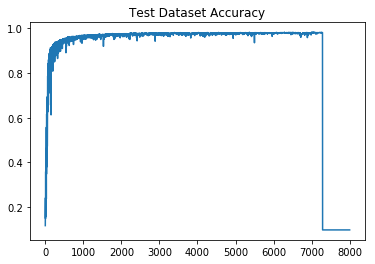

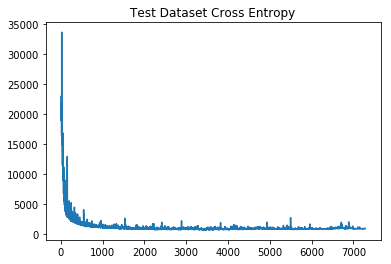

In [18]:
plt.figure()
plt.title("Test Dataset Accuracy")
plt.plot(test_accuracy)
plt.figure()
plt.title("Test Dataset Cross Entropy")
plt.plot(test_cross)
plt.show()

**Save tensorflow graph**

In [20]:
writer = tf.summary.FileWriter("/home/filip/Notebooks/Tensorflow_tutorial/logs")
writer.add_graph(sess.graph)